Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE


In [3]:
url ='./data/train.csv'
data = pd.read_csv(url)
data2 ='./data/test.csv'
test = pd.read_csv(data2)

In [4]:
df = data.copy()

## Empezamos con el Procesamiento de datos

In [5]:
df.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [6]:
df.tail()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,...,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,...,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,...,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,...,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07,0
5596,3294,0.09,10.81,0.69,2.67,0.060,5.97,0.02,1.15,0.53,...,0.088,8.15,1.72,0.001,36.53,5.66,0.00,0.17,0.02,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [8]:
df.isnull().sum()

ID        0
col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
col8      0
col9      0
col10     0
col11     0
col12     0
col13     0
col14     0
col15     0
col16     0
col17     0
col18     0
col19     0
col20     0
target    0
dtype: int64

In [9]:
df[df.duplicated(keep=False)]

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target


### Observaciones
1. No hay nulos
2. No hay valores duplicados.
3. Los tipos de datos están correctos.

# Analisis exploratorio

In [10]:
df.describe(include='all')

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


# Variables Eliminadas por Baja Variabilidad
-Se eliminaron las siguientes variables debido a su baja variabilidad, lo que significa que no aportaban información

In [11]:
low_variance_columns = ['col5', 'col12', 'col15', 'col18', 'col20']
df = df.drop(columns=low_variance_columns)
test_df = test.drop(columns=low_variance_columns)

- Estas variables fueron identificadas como aquellas con varianza menor  

# Variable numerica

In [12]:
numerical = df.select_dtypes(include=['number']).columns.tolist()

- Visualizaciones histogramas y boxplots

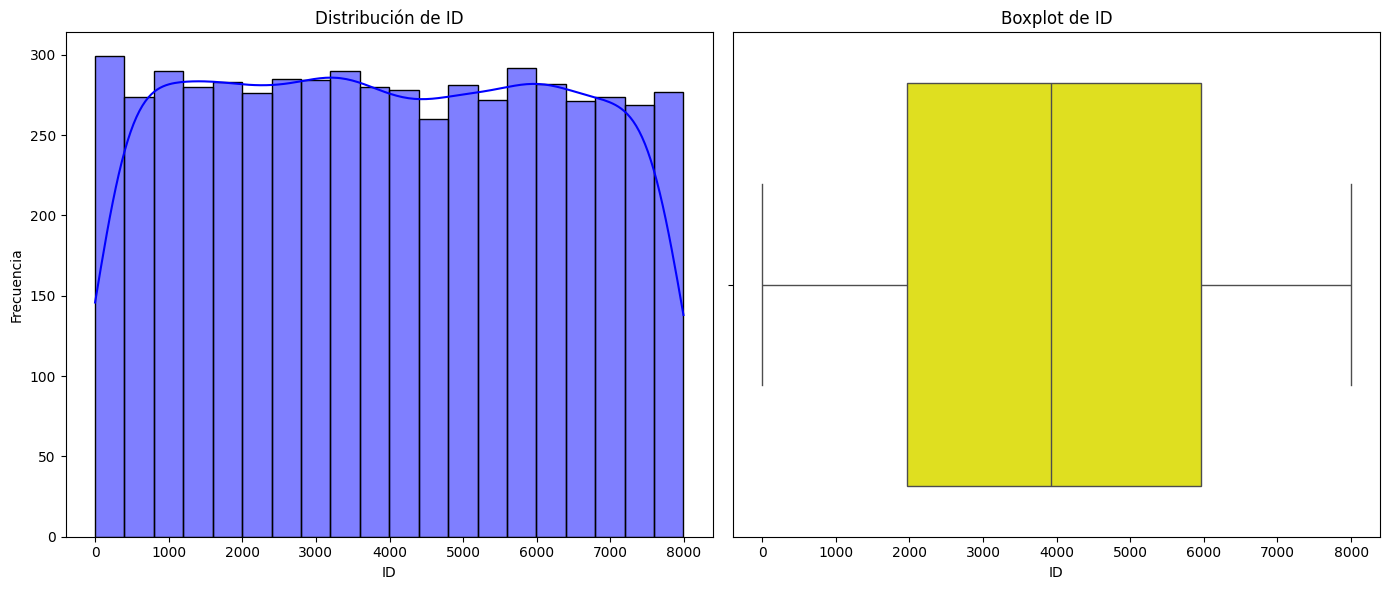

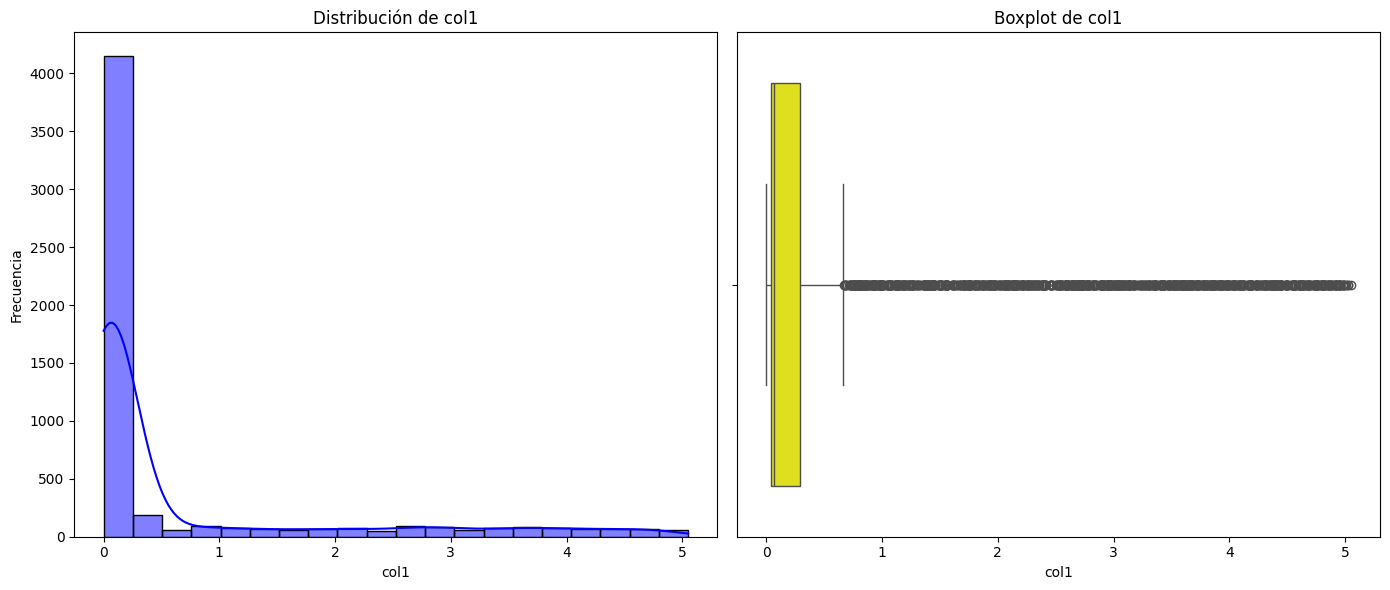

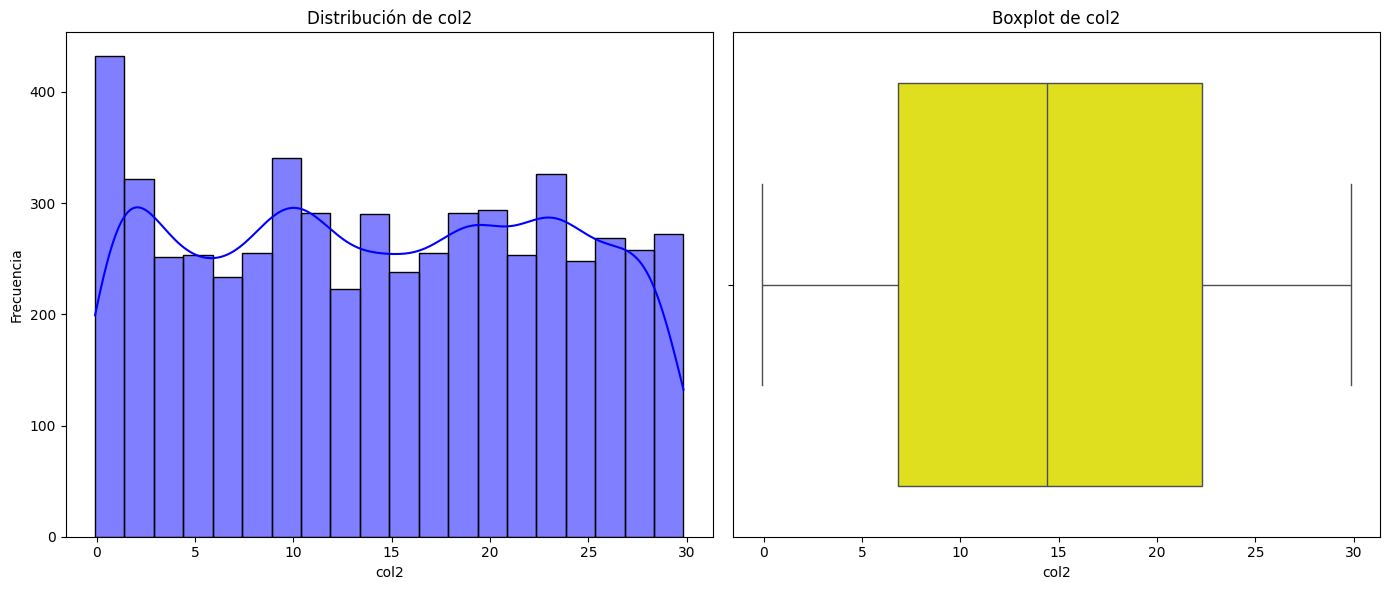

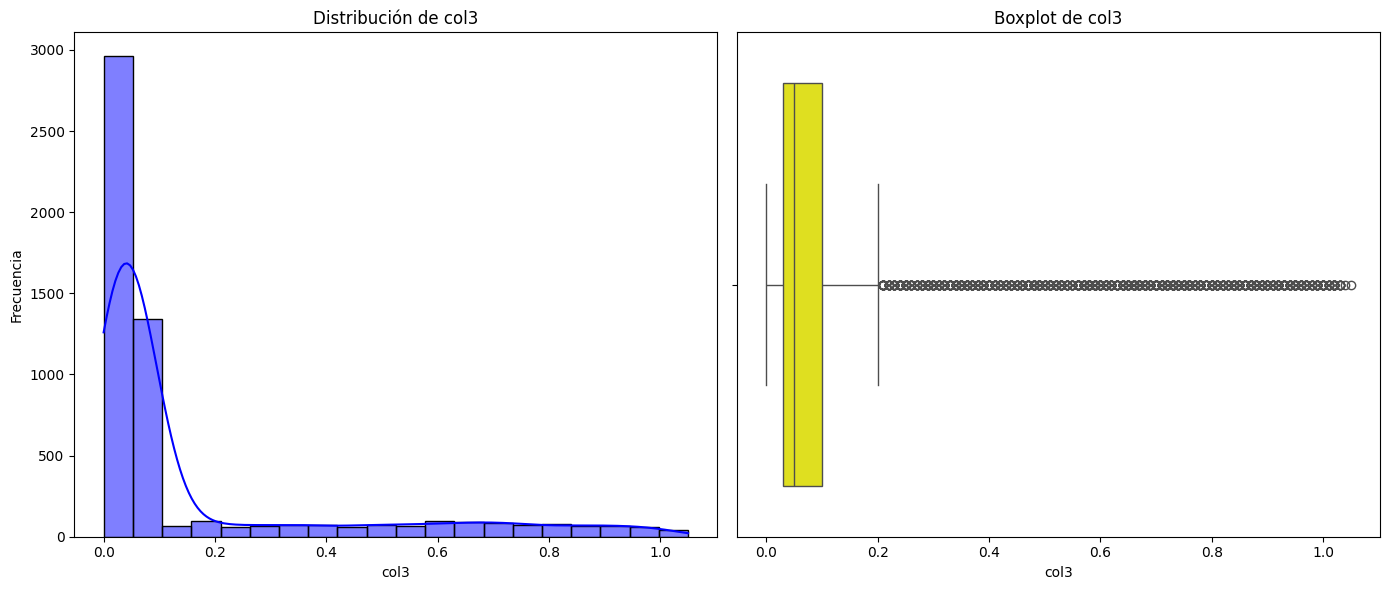

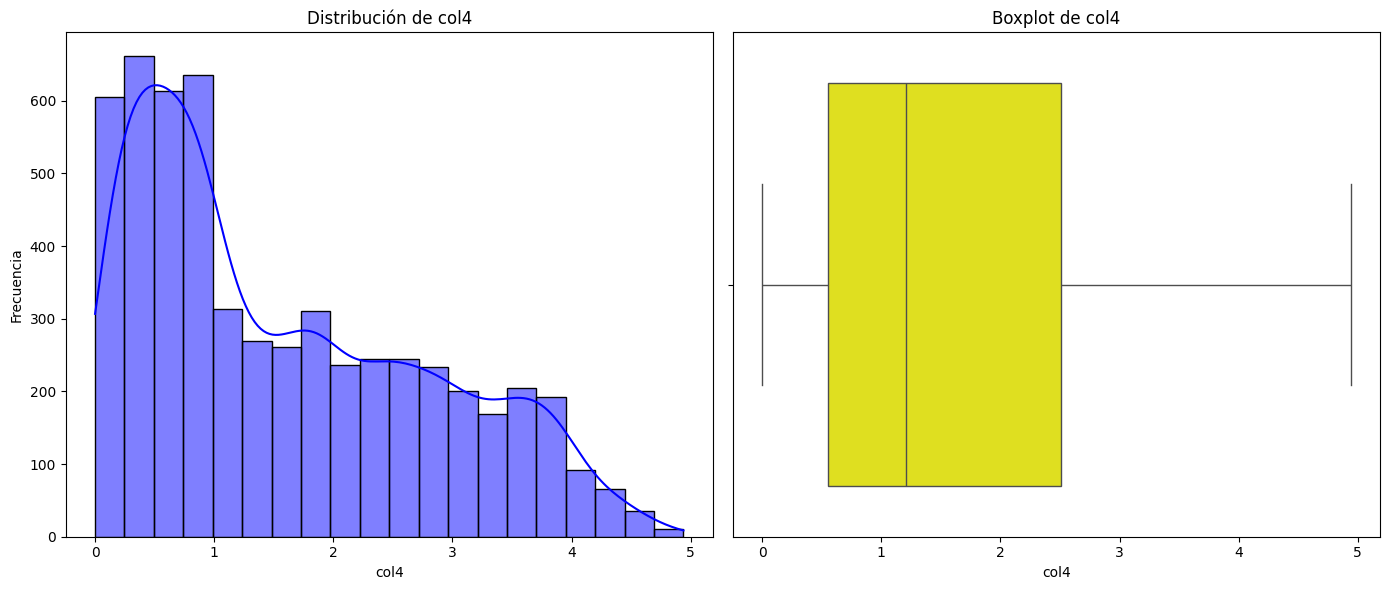

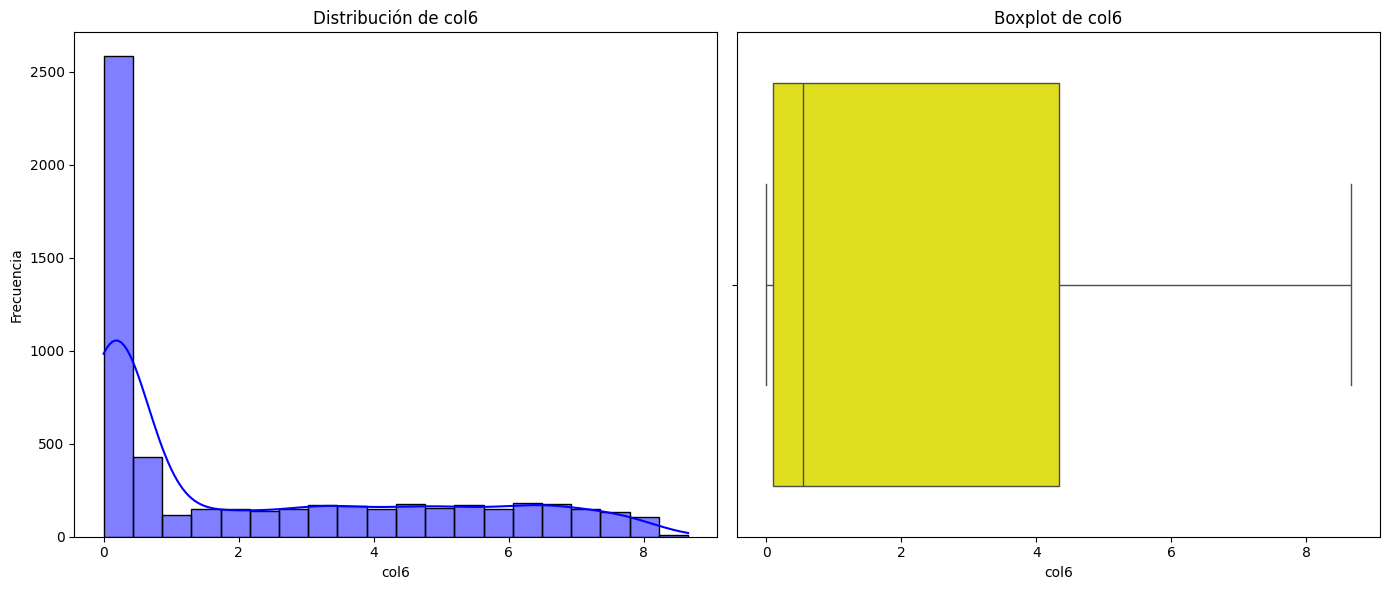

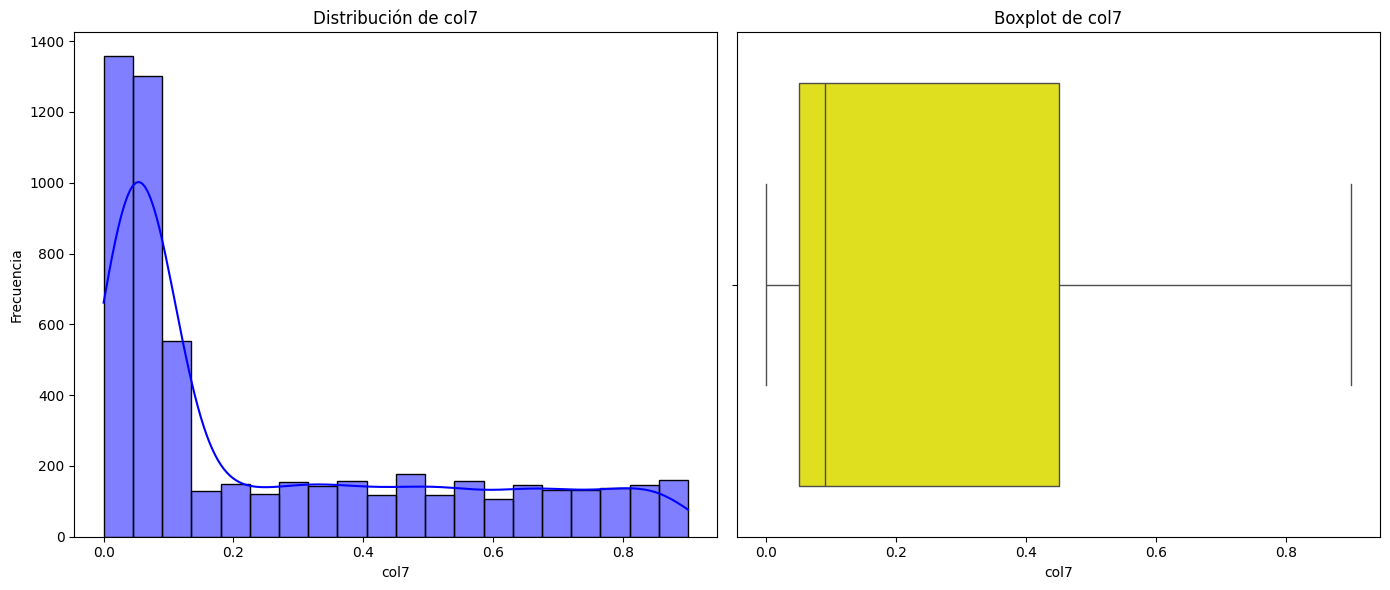

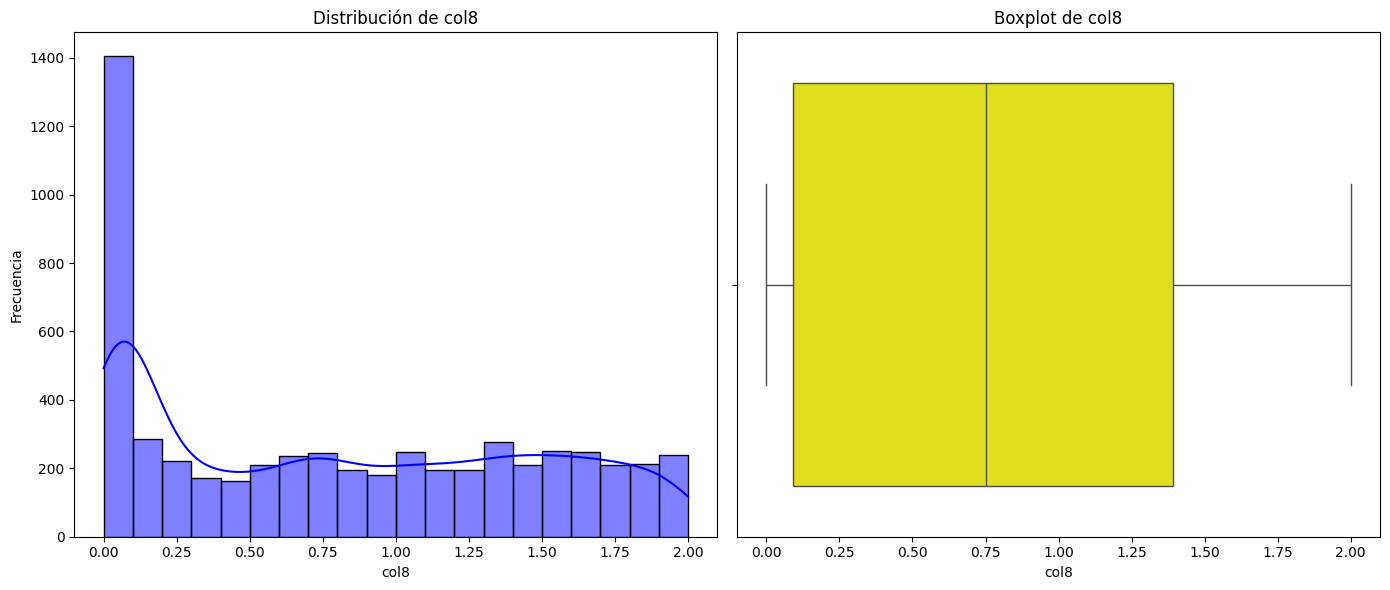

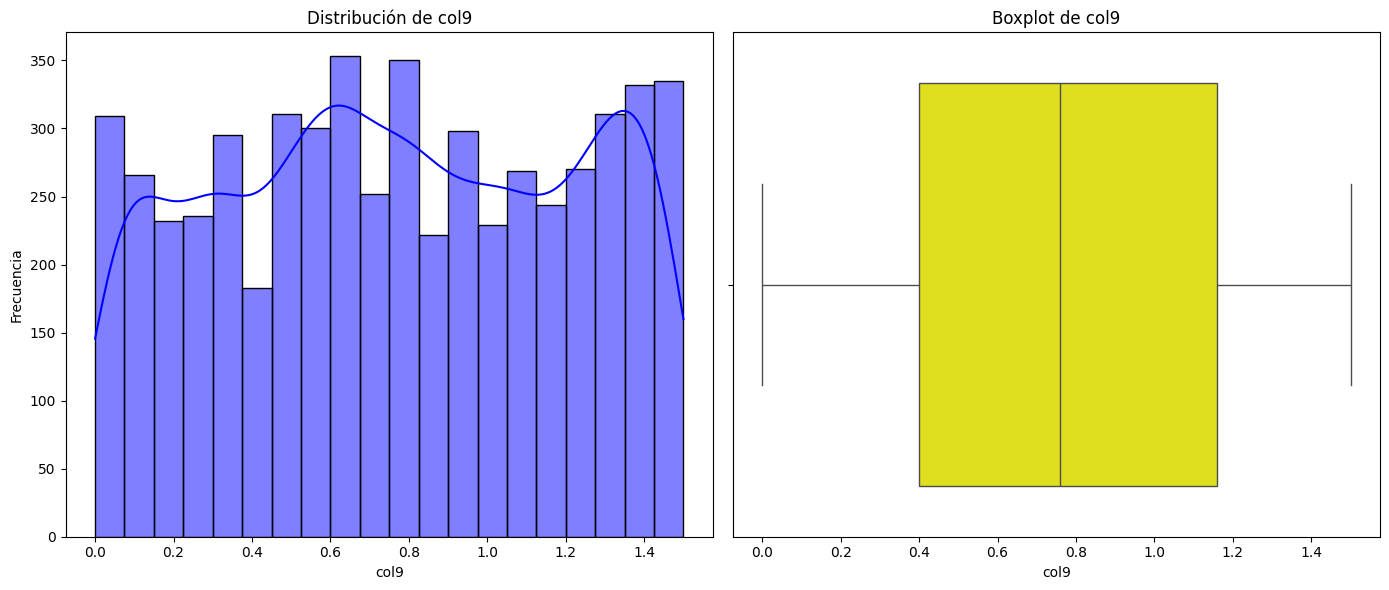

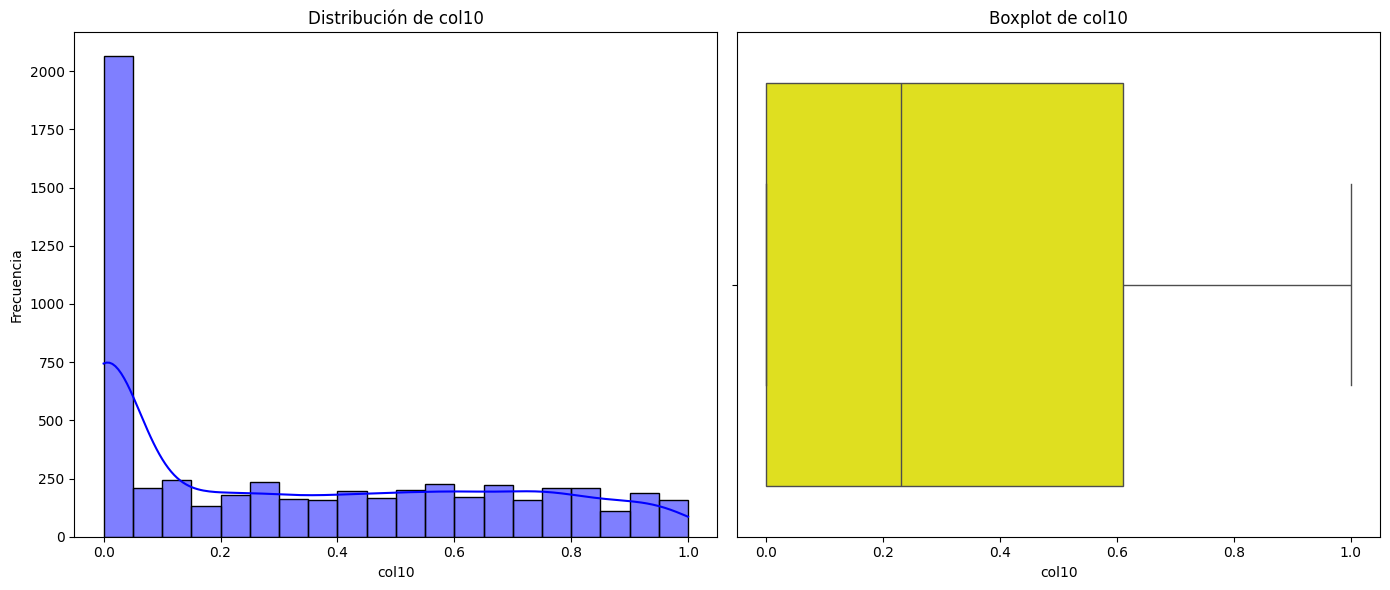

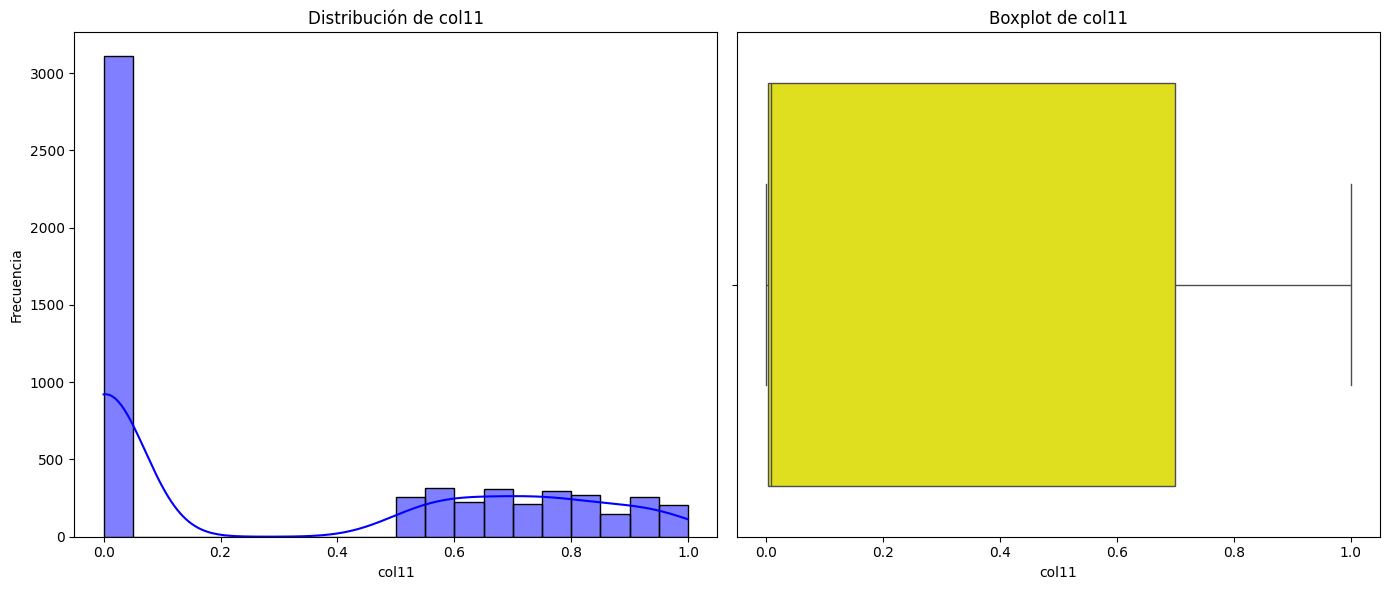

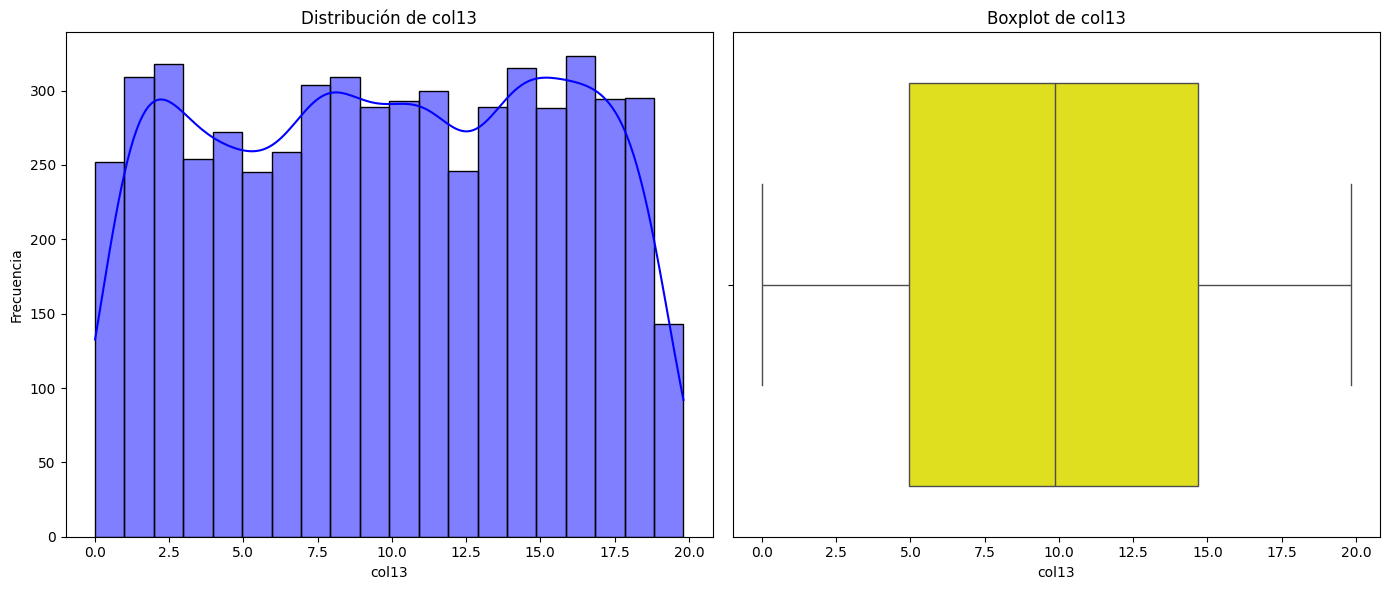

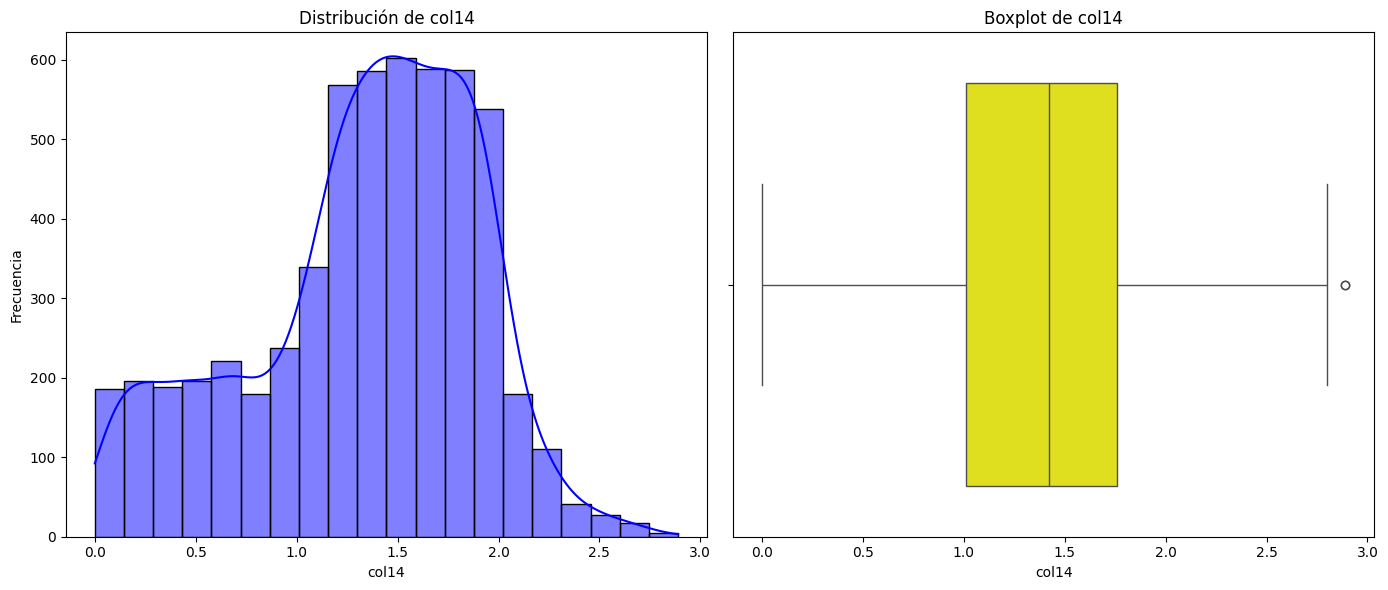

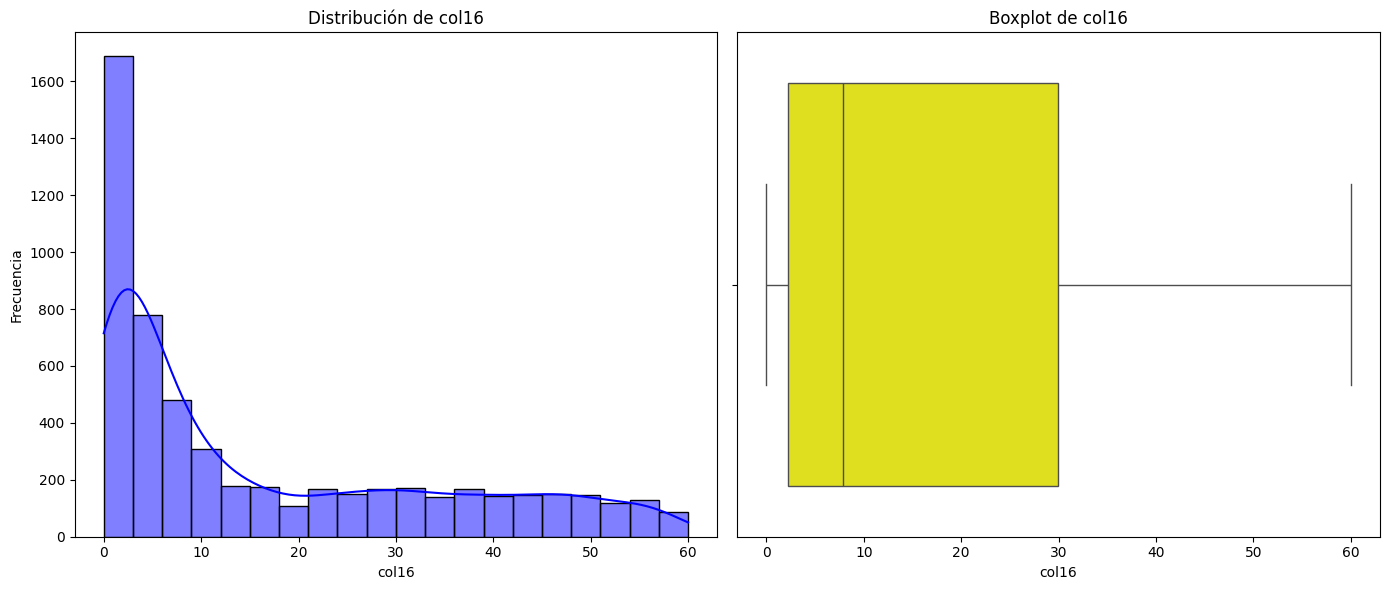

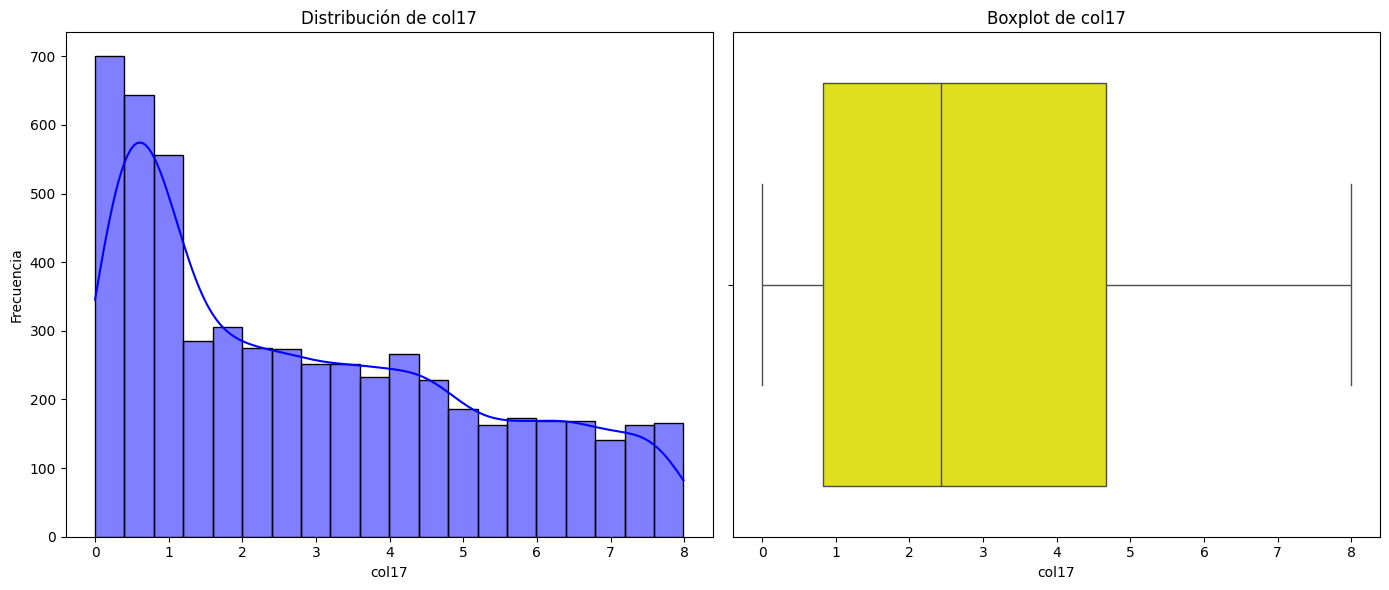

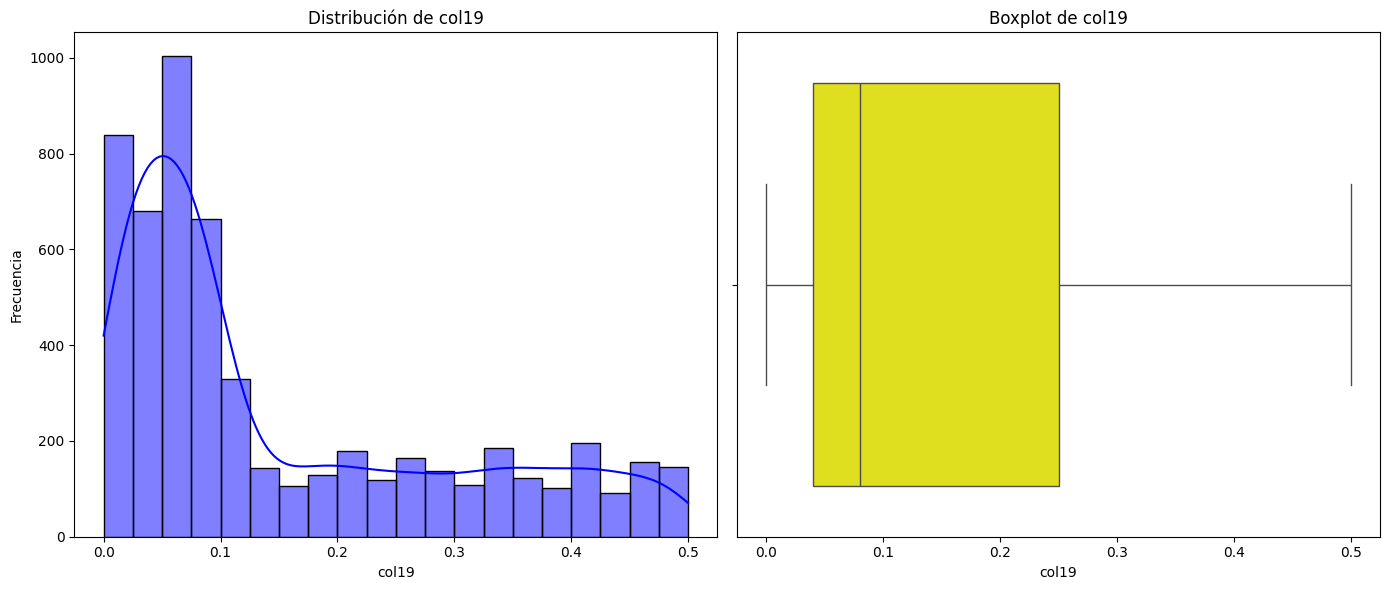

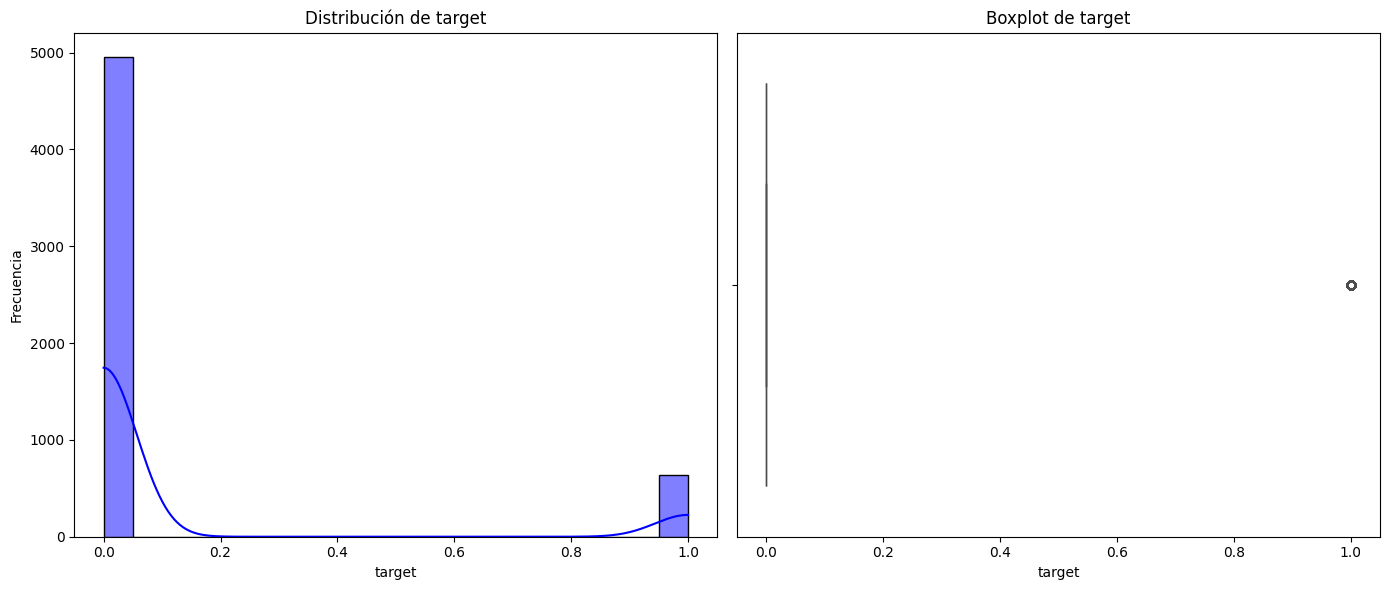

In [13]:
for col in numerical:
    plt.figure(figsize=(14, 6))

    '''Historgama'''
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    '''El boxplot'''
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='yellow')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

1. Histogramas (Distribución de datos)
---
- Sesgo en los datos: Si un histograma está inclinado hacia un lado, indica que la distribución no es simétrica.
- Distribución Normal: Algunas variables pueden seguir una distribución normal, lo que es ideal para ciertos modelos estadísticos.
- Multimodalidad: Si hay múltiples picos, sugiere que los datos pueden provenir de diferentes categorías o procesos.
---
2. Boxplots (Outliers y variabilidad)
- Valores extremos: Puntos fuera de los bigotes son valores que se consideran outliers, lo que puede indicar errores en los datos o valores que requieren tratamiento especial.
- Mediana y cuartiles: La línea dentro de la caja representa la mediana, mientras que los bordes de la caja muestran los percentiles 25% y 75%.
- Asimetría: Si la caja está inclinada o un bigote es mucho más largo que el otro, indica que los datos están distribuidos de manera desigual.

## Hagamos una correlacion.

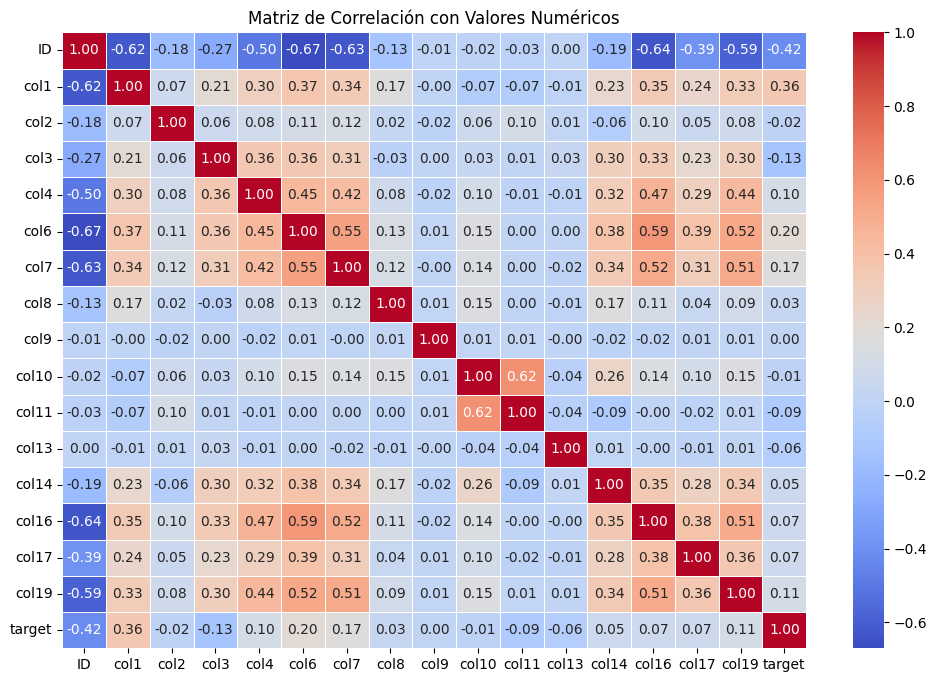

In [14]:
correlation = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación con Valores Numéricos")
plt.show()

- Encontramos dos variables muy correlacionadas que son señales de colinealidad.
- Las variables col1, col5, col6 y col7 mostraron las correlaciones más fuertes con el target

## Variable objetivo

Distribución de la variable objetivo:
target
0    0.885653
1    0.114347
Name: proportion, dtype: float64


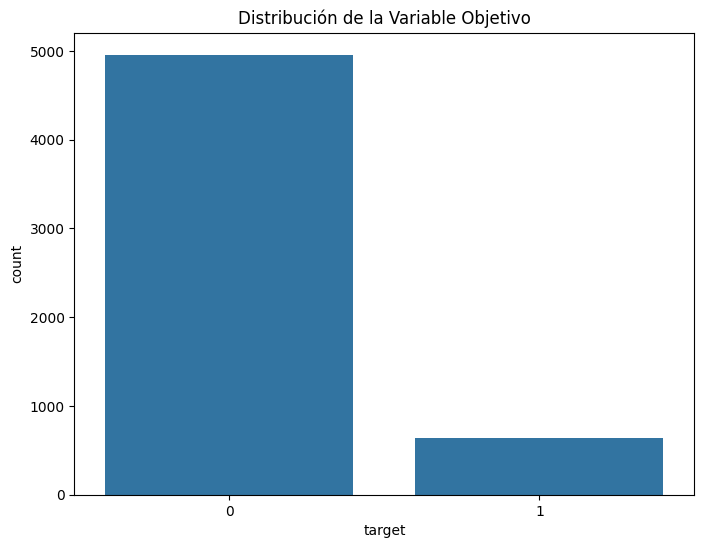

In [15]:
target_distribution = df['target'].value_counts(normalize=True)
print("Distribución de la variable objetivo:")
print(target_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribución de la Variable Objetivo')
plt.show()

- La clase 0 representa el 88.6% de los datos, mientras que la clase 1 solo el 11.4%.
  - Esto indica que el conjunto de datos está desbalanceado, lo que puede afectar el rendimiento de algunos modelos de machine learning.

# Preprocesamiento de datos

In [16]:
X = df.drop(['ID', 'target'], axis=1)
y = df['target']
X_test = test_df.drop('ID', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
X

,col1,col2,col3,col4,col6,col7,col8,col9,col10,col11,col13,col14,col16,col17,col19
0,0.02,26.80,0.09,1.35,0.09,0.09,1.97,1.48,0.00,0.009,9.52,0.84,1.24,0.96,0.08
1,1.13,3.95,0.32,3.95,4.66,0.56,1.89,1.36,0.82,0.820,13.83,1.15,10.55,3.76,0.45
2,0.07,8.05,0.04,0.14,0.06,0.06,0.05,0.00,0.00,0.000,2.61,1.52,4.13,0.27,0.03
3,0.09,26.40,0.03,0.92,0.57,0.00,0.36,0.03,0.23,0.004,5.22,1.96,11.32,0.25,0.01
4,0.94,14.47,0.03,2.88,0.80,0.43,1.38,0.11,0.67,0.670,9.75,1.89,27.17,5.42,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,0.01,8.92,0.20,4.88,0.36,0.09,0.54,0.14,0.27,0.004,8.60,1.90,17.18,2.91,0.43
5593,0.09,1.36,0.04,3.45,3.42,0.03,1.39,1.12,0.10,0.001,9.36,1.58,42.15,4.39,0.11
5594,0.10,4.95,0.01,0.25,0.09,0.10,1.88,0.33,0.00,0.007,18.78,0.62,5.97,0.32,0.10
5595,0.05,23.18,0.04,3.65,4.43,0.63,1.94,1.27,0.08,0.008,13.32,1.93,23.84,4.80,0.22


## Balanceo de datos con Smote

In [18]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Normalizacion de datos

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
- Regresion logistica.

In [20]:
log_reg_model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log = log_reg_model.predict(X_val_scaled)

- Random forest

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_val_scaled)

# Evaluacion de los modelos

In [22]:
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_report = classification_report(y_val, y_pred_rf)

log_accuracy = accuracy_score(y_val, y_pred_log)
log_report = classification_report(y_val, y_pred_log)

# Predicciones

In [23]:
rf_predictions = rf_model.predict(X_test_scaled)
log_predictions = log_reg_model.predict(X_test_scaled)

# Evaluación de modelos 

In [24]:
rf_report = classification_report(y_val, y_pred_rf, output_dict=True)
log_report = classification_report(y_val, y_pred_log, output_dict=True)
'''Dataframe'''
rf_report_df = pd.DataFrame.from_dict(rf_report).transpose()
log_report_df = pd.DataFrame.from_dict(log_report).transpose()

# Imprimir modelos
- Mostrar los resultados de Random Forest
- Mostrar los resultados de Regresión Logística

In [ ]:
print("Resultados Random Forest ")
print(rf_report_df)

print("Resultados Regresión Logística")
print(log_report_df)


Resultados Random Forest 
              precision    recall  f1-score     support
0              0.960000  0.991935  0.975706   992.00000
1              0.915789  0.679688  0.780269   128.00000
accuracy       0.956250  0.956250  0.956250     0.95625
macro avg      0.937895  0.835811  0.877988  1120.00000
weighted avg   0.954947  0.956250  0.953371  1120.00000

Resultados Regresión Logística
              precision    recall  f1-score      support
0              0.962264  0.822581  0.886957   992.000000
1              0.352941  0.750000  0.480000   128.000000
accuracy       0.814286  0.814286  0.814286     0.814286
macro avg      0.657603  0.786290  0.683478  1120.000000
weighted avg   0.892627  0.814286  0.840447  1120.000000


- Random Forest tiene mayor precisión global, pero detecta menos casos de target=1.
- Regresión Logística detecta más casos de target=1, pero con menor precisión.

In [29]:
print("Regresión Logística - Exactitud:", accuracy_score(y_val, y_pred_log))
print("Random Forest - Exactitud:", accuracy_score(y_val, y_pred_rf))

print("Matriz de Confusión - Regresión Logística")
print(confusion_matrix(y_val, y_pred_log))
print("Matriz de Confusión - Random Forest")
print(confusion_matrix(y_val, y_pred_rf))

print("Reporte de Clasificación - Regresión Logística")
print(classification_report(y_val, y_pred_log))
print("Reporte de Clasificación - Random Forest")
print(classification_report(y_val, y_pred_rf))


Regresión Logística - Exactitud: 0.8142857142857143
Random Forest - Exactitud: 0.95625
Matriz de Confusión - Regresión Logística
[[816 176]
 [ 32  96]]
Matriz de Confusión - Random Forest
[[984   8]
 [ 41  87]]
Reporte de Clasificación - Regresión Logística
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       992
           1       0.35      0.75      0.48       128

    accuracy                           0.81      1120
   macro avg       0.66      0.79      0.68      1120
weighted avg       0.89      0.81      0.84      1120

Reporte de Clasificación - Random Forest
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       992
           1       0.92      0.68      0.78       128

    accuracy                           0.96      1120
   macro avg       0.94      0.84      0.88      1120
weighted avg       0.95      0.96      0.95      1120



In [30]:
test_predictions_rf = rf_model.predict(X_test_scaled)

test_df['target'] = test_predictions_rf
test_df[['ID', 'target']].to_csv("test_predictions.csv", index=False)

print("Predicciones guardadas en 'test_predictions.csv'")

Predicciones guardadas en 'test_predictions.csv'
